# Mental Health and Music

### Impact of Favorite Genre on Mental Health

Question: Does the favorite genre of music have an impact on mental health conditions?

Analysis: Compare mental health scores for different favorite genres.

In [26]:
#Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [27]:
#Open file and save to a variable
music=Path("./Data/mxmh_survey_results.csv")

#Read CSV as a DataFrame
music_df=pd.read_csv(music)
music_df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [28]:
#Clean data
music_df.count()
music_df= music_df.fillna({'BPM': ''})
music_df.count()
cleaned= music_df.dropna(how='any')
cleaned.count()

Timestamp                       718
Age                             718
Primary streaming service       718
Hours per day                   718
While working                   718
Instrumentalist                 718
Composer                        718
Fav genre                       718
Exploratory                     718
Foreign languages               718
BPM                             718
Frequency [Classical]           718
Frequency [Country]             718
Frequency [EDM]                 718
Frequency [Folk]                718
Frequency [Gospel]              718
Frequency [Hip hop]             718
Frequency [Jazz]                718
Frequency [K pop]               718
Frequency [Latin]               718
Frequency [Lofi]                718
Frequency [Metal]               718
Frequency [Pop]                 718
Frequency [R&B]                 718
Frequency [Rap]                 718
Frequency [Rock]                718
Frequency [Video game music]    718
Anxiety                     

In [29]:
#Create a DataFrame of cleaned data
cleaned_df=pd.DataFrame(cleaned)
cleaned_df.head()
cleaned_df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [30]:
#Reduce DataFrame to pertinent columns
df=cleaned_df[['Fav genre', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]
df

,Fav genre,Anxiety,Depression,Insomnia,OCD
2,Video game music,7.0,7.0,10.0,2.0
3,Jazz,9.0,7.0,3.0,3.0
4,R&B,7.0,2.0,5.0,9.0
5,Jazz,8.0,8.0,7.0,7.0
6,Video game music,4.0,8.0,6.0,0.0
...,...,...,...,...,...
731,Rock,7.0,6.0,0.0,9.0
732,Pop,3.0,2.0,2.0,5.0
733,Rap,2.0,2.0,2.0,2.0
734,Classical,2.0,3.0,2.0,1.0


In [31]:
# Group by 'Fav genre' and calculate the mean for each column
grouped_means = df.groupby('Fav genre').mean().reset_index()
grouped_means

,Fav genre,Anxiety,Depression,Insomnia,OCD
0,Classical,4.901961,4.058824,3.686275,2.372549
1,Country,5.250000,4.166667,2.458333,2.583333
2,EDM,5.361111,5.111111,3.944444,2.888889
3,Folk,6.689655,5.137931,3.724138,2.275862
4,Gospel,4.833333,2.666667,5.333333,0.333333
5,Hip hop,6.117647,5.882353,3.470588,2.588235
6,Jazz,5.900000,4.500000,3.850000,2.800000
7,K pop,6.523810,3.904762,3.190476,2.476190
8,Latin,5.000000,4.500000,4.500000,2.500000
9,Lofi,6.100000,6.600000,5.600000,3.400000


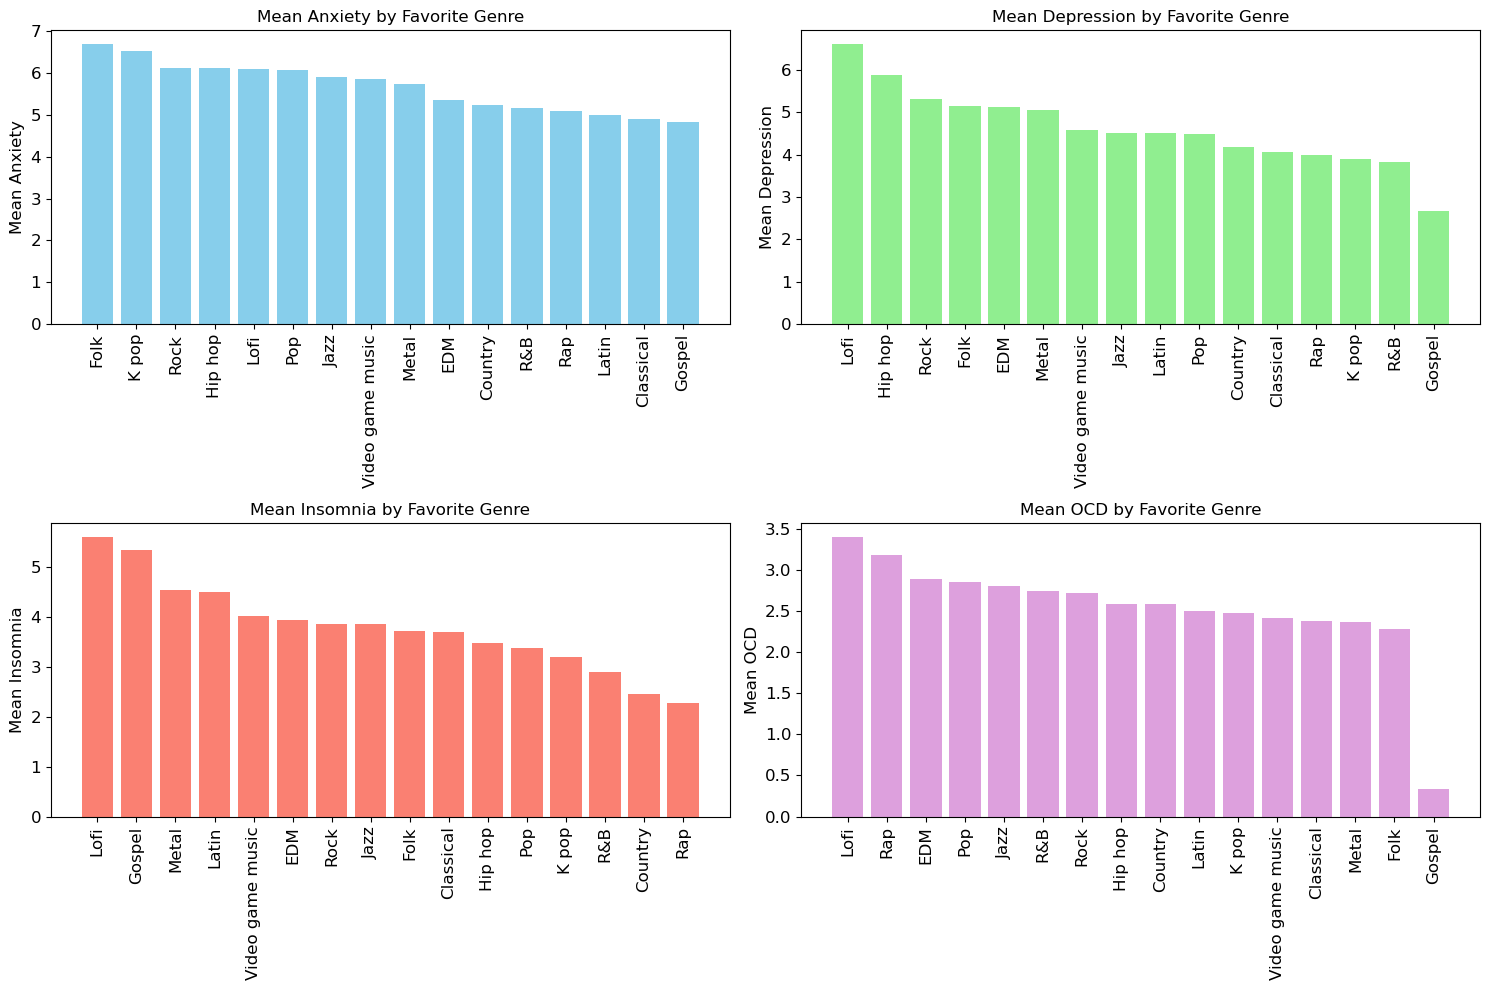

In [32]:
# Define colors for each of the four bar plots
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

# Plotting the means for each column with sorting and custom colors
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Create a 2x2 subplot

# Font size
font_size = 12

# Sort and plot for 'Anxiety'
sorted_anxiety = grouped_means.sort_values(by='Anxiety', ascending=False)
axes[0, 0].bar(sorted_anxiety['Fav genre'], sorted_anxiety['Anxiety'], color=colors[0])
axes[0, 0].set_title('Mean Anxiety by Favorite Genre', fontsize=font_size)
axes[0, 0].set_ylabel('Mean Anxiety', fontsize=font_size)
axes[0, 0].tick_params(axis='x', rotation=90, labelsize=font_size)
axes[0, 0].tick_params(axis='y', labelsize=font_size)

# Sort and plot for 'Depression'
sorted_depression = grouped_means.sort_values(by='Depression', ascending=False)
axes[0, 1].bar(sorted_depression['Fav genre'], sorted_depression['Depression'], color=colors[1])
axes[0, 1].set_title('Mean Depression by Favorite Genre', fontsize=font_size)
axes[0, 1].set_ylabel('Mean Depression', fontsize=font_size)
axes[0, 1].tick_params(axis='x', rotation=90, labelsize=font_size)
axes[0, 1].tick_params(axis='y', labelsize=font_size)

# Sort and plot for 'Insomnia'
sorted_insomnia = grouped_means.sort_values(by='Insomnia', ascending=False)
axes[1, 0].bar(sorted_insomnia['Fav genre'], sorted_insomnia['Insomnia'], color=colors[2])
axes[1, 0].set_title('Mean Insomnia by Favorite Genre', fontsize=font_size)
axes[1, 0].set_ylabel('Mean Insomnia', fontsize=font_size)
axes[1, 0].tick_params(axis='x', rotation=90, labelsize=font_size)
axes[1, 0].tick_params(axis='y', labelsize=font_size)

# Sort and plot for 'OCD'
sorted_ocd = grouped_means.sort_values(by='OCD', ascending=False)
axes[1, 1].bar(sorted_ocd['Fav genre'], sorted_ocd['OCD'], color=colors[3])
axes[1, 1].set_title('Mean OCD by Favorite Genre', fontsize=font_size)
axes[1, 1].set_ylabel('Mean OCD', fontsize=font_size)
axes[1, 1].tick_params(axis='x', rotation=90, labelsize=font_size)
axes[1, 1].tick_params(axis='y', labelsize=font_size)

plt.tight_layout()
plt.show()



# Analysis

Based on the data presented in the bar charts, it appears that favorite genres of music are associated with different levels of various mental health conditions, suggesting a potential impact of music preferences on mental health. Here's a breakdown for each condition:

### Anxiety:

+ Genres like Folk, K-pop, and Hip hop are associated with higher mean anxiety levels.

+ Genres such as Gospel, Classical, and Latin are associated with lower mean anxiety levels.


### Depression:

+ Lofi and Hip hop have higher mean depression levels.
+ Gospel, Classical, and R&B have lower mean depression levels.

### Insomnia:

+ Lofi and Gospel are associated with higher mean insomnia levels.

+ Genres like Rap, Country, and R&B show lower mean insomnia levels.

### OCD:

+ Lofi and Rap have higher mean OCD levels.

+ Gospel, Folk, and Metal have lower mean OCD levels.


These trends suggest that individuals who prefer certain genres of music may experience different levels of mental health conditions. It’s important to note that while the data shows associations, it does not necessarily imply causation. Other factors may also contribute to these mental health conditions, and further research would be necessary to establish a causal relationship.